(esercizi-cfa)=
# ✏️ Esercizi

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semTools")
})
set.seed(42)

**E1.** Si ripeta l'esercizio che abbiamo svolto in precedenza usando l'analisi fattoriale esplorativa, questa volta usando la CFA in `lavaan`. I dati sono forniti da {cite:t}`brown2015confirmatory` e riguardano a otto misure di personalità raccolte su un campione di 250 pazienti che hanno concluso un programma di psicoterapia:

- anxiety (N1), 
- hostility (N2), 
- depression (N3), 
- self-consciousness (N4), 
- warmth (E1), 
- gregariousness (E2), 
- assertiveness (E3), 
- positive emotions (E4). 

In [2]:
varnames <- c("N1", "N2", "N3", "N4", "E1", "E2", "E3", "E4")
sds <- "5.7  5.6  6.4  5.7  6.0  6.2  5.7  5.6"

cors <- "
 1.000
 0.767  1.000
 0.731  0.709  1.000
 0.778  0.738  0.762  1.000
-0.351  -0.302  -0.356  -0.318  1.000
-0.316  -0.280  -0.300  -0.267  0.675  1.000
-0.296  -0.289  -0.297  -0.296  0.634  0.651  1.000
-0.282  -0.254  -0.292  -0.245  0.534  0.593  0.566  1.000"

psychot_cor_mat <- getCov(cors, names = varnames)
n <- 250

Il modello con due fattori ortogonali può essere adattato ai dati nel modo seguente.

In [3]:
cfa_mod <- "
  N =~ N1 + N2 + N3 + N4
  E =~ E1 + E2 + E3 + E4
"

In [4]:
fit_cfa <- lavaan::cfa(
    cfa_mod,
    sample.cov = psychot_cor_mat,
    sample.nobs = n,
    orthogonal = TRUE,
    std.lv = TRUE
)

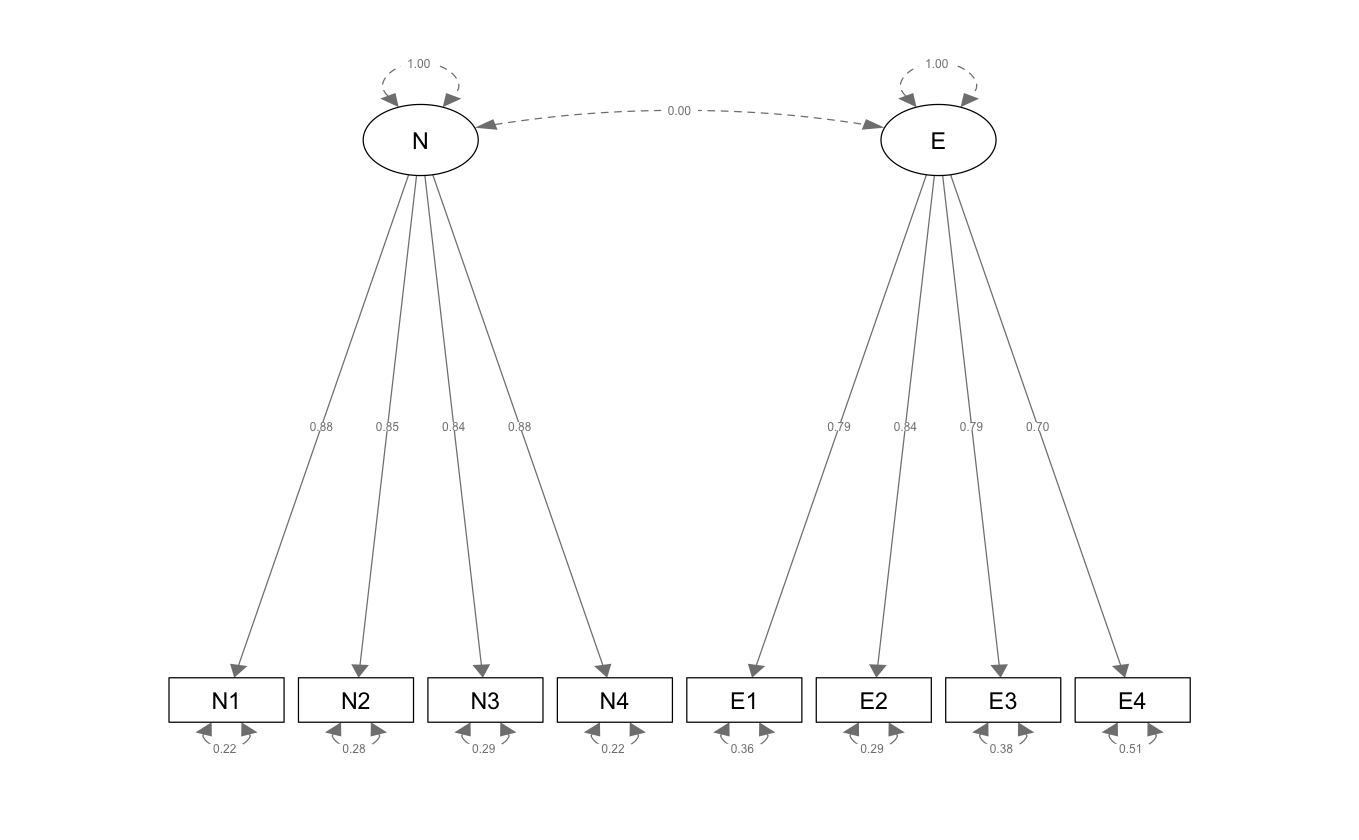

In [5]:
semPlot::semPaths(fit_cfa,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Esaminiamo le saturazioni fattoriali:

In [6]:
parameterEstimates(fit_cfa, standardized = TRUE) %>%
    dplyr::filter(op == "=~") %>%
    dplyr::select(
        "Latent Factor" = lhs,
        Indicator = rhs,
        B = est,
        SE = se,
        Z = z,
        "p-value" = pvalue,
        Beta = std.all
    ) %>%
    knitr::kable(
        digits = 3, booktabs = TRUE, format = "markdown",
        caption = "Factor Loadings"
    )



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|N             |N1        | 0.882| 0.051| 17.422|       0| 0.884|
|N             |N2        | 0.847| 0.052| 16.340|       0| 0.849|
|N             |N3        | 0.840| 0.052| 16.134|       0| 0.842|
|N             |N4        | 0.882| 0.051| 17.432|       0| 0.884|
|E             |E1        | 0.795| 0.056| 14.276|       0| 0.796|
|E             |E2        | 0.838| 0.054| 15.369|       0| 0.839|
|E             |E3        | 0.788| 0.056| 14.097|       0| 0.789|
|E             |E4        | 0.697| 0.058| 11.942|       0| 0.699|

Il risultato sembra sensato: le saturazioni su ciascun fattore sono molto alte. Tuttavia, la matrice delle correlazioni residue

In [7]:
cor_table <- residuals(fit_cfa, type = "cor")$cov
knitr::kable(
    cor_table,
    digits = 3,
    format = "markdown",
    booktabs = TRUE
)



|   |     N1|     N2|     N3|     N4|     E1|     E2|     E3|     E4|
|:--|------:|------:|------:|------:|------:|------:|------:|------:|
|N1 |  0.000|  0.017| -0.013| -0.003| -0.351| -0.316| -0.296| -0.282|
|N2 |  0.017|  0.000| -0.006| -0.012| -0.302| -0.280| -0.289| -0.254|
|N3 | -0.013| -0.006|  0.000|  0.018| -0.356| -0.300| -0.297| -0.292|
|N4 | -0.003| -0.012|  0.018|  0.000| -0.318| -0.267| -0.296| -0.245|
|E1 | -0.351| -0.302| -0.356| -0.318|  0.000|  0.007|  0.006| -0.022|
|E2 | -0.316| -0.280| -0.300| -0.267|  0.007|  0.000| -0.011|  0.007|
|E3 | -0.296| -0.289| -0.297| -0.296|  0.006| -0.011|  0.000|  0.015|
|E4 | -0.282| -0.254| -0.292| -0.245| -0.022|  0.007|  0.015|  0.000|

rivela che il modello ipotizzato dall'analisi fattoriale confermativa non è adeguato.

In [8]:
fit2_cfa <- lavaan::cfa(
    cfa_mod,
    sample.cov = psychot_cor_mat,
    sample.nobs = n,
    orthogonal = FALSE,
    std.lv = TRUE
)

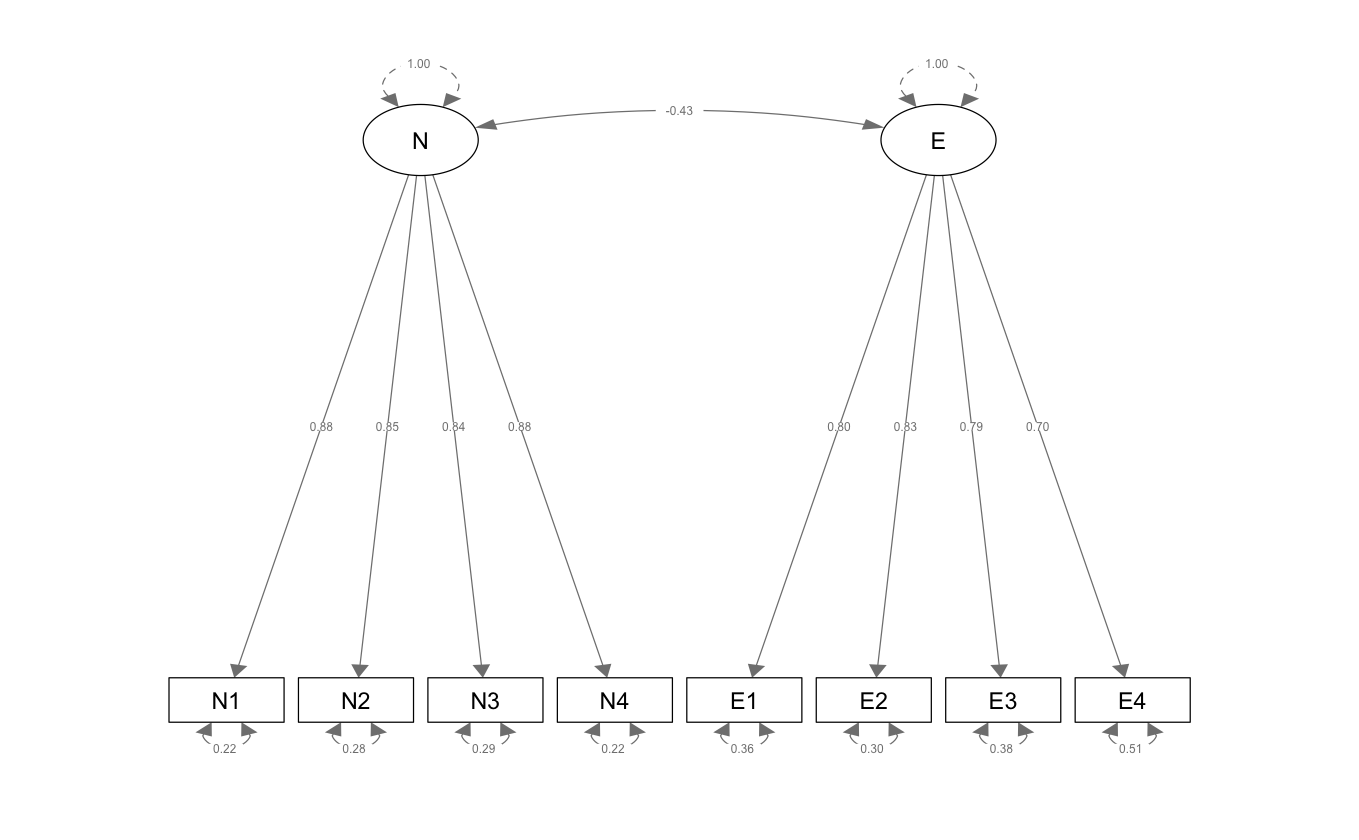

In [9]:
semPlot::semPaths(fit2_cfa,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Esaminiamo le saturazioni fattoriali.

In [10]:
parameterEstimates(fit2_cfa, standardized = TRUE) %>%
    dplyr::filter(op == "=~") %>%
    dplyr::select(
        "Latent Factor" = lhs,
        Indicator = rhs,
        B = est,
        SE = se,
        Z = z,
        "p-value" = pvalue,
        Beta = std.all
    ) %>%
    knitr::kable(
        digits = 3, booktabs = TRUE, format = "markdown",
        caption = "Factor Loadings"
    )



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|N             |N1        | 0.883| 0.051| 17.472|       0| 0.885|
|N             |N2        | 0.847| 0.052| 16.337|       0| 0.849|
|N             |N3        | 0.842| 0.052| 16.190|       0| 0.844|
|N             |N4        | 0.880| 0.051| 17.381|       0| 0.882|
|E             |E1        | 0.800| 0.055| 14.465|       0| 0.802|
|E             |E2        | 0.832| 0.054| 15.294|       0| 0.834|
|E             |E3        | 0.788| 0.056| 14.150|       0| 0.789|
|E             |E4        | 0.698| 0.058| 11.974|       0| 0.699|

Esaminiamo i residui.

In [11]:
cor_table <- residuals(fit2_cfa, type = "cor")$cov
knitr::kable(
    cor_table,
    digits = 3,
    format = "markdown",
    booktabs = TRUE
)



|   |     N1|     N2|     N3|     N4|     E1|     E2|     E3|     E4|
|:--|------:|------:|------:|------:|------:|------:|------:|------:|
|N1 |  0.000|  0.016| -0.015| -0.002| -0.042|  0.005|  0.008| -0.013|
|N2 |  0.016|  0.000| -0.007| -0.010| -0.006|  0.028|  0.002|  0.004|
|N3 | -0.015| -0.007|  0.000|  0.018| -0.062|  0.006| -0.007| -0.035|
|N4 | -0.002| -0.010|  0.018|  0.000| -0.010|  0.053|  0.007|  0.023|
|E1 | -0.042| -0.006| -0.062| -0.010|  0.000|  0.006|  0.001| -0.027|
|E2 |  0.005|  0.028|  0.006|  0.053|  0.006|  0.000| -0.007|  0.010|
|E3 |  0.008|  0.002| -0.007|  0.007|  0.001| -0.007|  0.000|  0.014|
|E4 | -0.013|  0.004| -0.035|  0.023| -0.027|  0.010|  0.014|  0.000|

Sistemiamo le saturazioni fattoriali in una matrice 8 $\times$ 2:

In [12]:
lambda <- inspect(fit2_cfa, what = "std")$lambda
lambda

,N,E
N1,0.8848214,0.0000000
N2,0.8485128,0.0000000
N3,0.8436432,0.0000000
N4,0.8819736,0.0000000
E1,0.0000000,0.8018485
E2,0.0000000,0.8337599
E3,0.0000000,0.7894530
E4,0.0000000,0.6990366


Otteniamo la matrice di intercorrelazoni fattoriali.

In [13]:
Phi <- inspect(fit2_cfa, what = "std")$psi
Phi

,N,E
N,1.000000,-0.434962
E,-0.434962,1.000000


Otteniamo la matrice di varianze residue.

In [14]:
Psi <- inspect(fit2_cfa, what = "std")$theta
Psi

,N1,N2,N3,N4,E1,E2,E3,E4
N1,0.217091,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N2,0.000000,0.2800261,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N3,0.000000,0.0000000,0.2882661,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N4,0.000000,0.0000000,0.0000000,0.2221225,0.000000,0.0000000,0.000000,0.0000000
E1,0.000000,0.0000000,0.0000000,0.0000000,0.357039,0.0000000,0.000000,0.0000000
E2,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.3048445,0.000000,0.0000000
E3,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.376764,0.0000000
E4,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.5113478


Mediante i parametri del modello  la matrice di correlazione si riproduce nel modo seguente:

$$
\boldsymbol{\Sigma} =\boldsymbol{\Lambda} \boldsymbol{\Phi} \boldsymbol{\Lambda}^{\mathsf{T}} + \boldsymbol{\Psi}. 
$$

In $\textsf{R}$ scriviamo:

In [15]:
R_hat <- lambda %*% Phi %*% t(lambda) + Psi
R_hat %>%
    round(3)

,N1,N2,N3,N4,E1,E2,E3,E4
N1,1.000,0.751,0.746,0.780,-0.309,-0.321,-0.304,-0.269
N2,0.751,1.000,0.716,0.748,-0.296,-0.308,-0.291,-0.258
N3,0.746,0.716,1.000,0.744,-0.294,-0.306,-0.290,-0.257
N4,0.780,0.748,0.744,1.000,-0.308,-0.320,-0.303,-0.268
E1,-0.309,-0.296,-0.294,-0.308,1.000,0.669,0.633,0.561
E2,-0.321,-0.308,-0.306,-0.320,0.669,1.000,0.658,0.583
E3,-0.304,-0.291,-0.290,-0.303,0.633,0.658,1.000,0.552
E4,-0.269,-0.258,-0.257,-0.268,0.561,0.583,0.552,1.000


Le correlazioni residue sono:

In [16]:
(psychot_cor_mat - R_hat) %>%
    round(3)

,N1,N2,N3,N4,E1,E2,E3,E4
N1,0.000,0.016,-0.015,-0.002,-0.042,0.005,0.008,-0.013
N2,0.016,0.000,-0.007,-0.010,-0.006,0.028,0.002,0.004
N3,-0.015,-0.007,0.000,0.018,-0.062,0.006,-0.007,-0.035
N4,-0.002,-0.010,0.018,0.000,-0.010,0.053,0.007,0.023
E1,-0.042,-0.006,-0.062,-0.010,0.000,0.006,0.001,-0.027
E2,0.005,0.028,0.006,0.053,0.006,0.000,-0.007,0.010
E3,0.008,0.002,-0.007,0.007,0.001,-0.007,0.000,0.014
E4,-0.013,0.004,-0.035,0.023,-0.027,0.010,0.014,0.000


Calcoliamo la correlazione predetta dal modello tra le variabili $Y_1$ e $Y_2$:

In [17]:
lambda[1, 1] * lambda[2, 1] + lambda[1, 2] * lambda[2, 2] +
    lambda[1, 1] * lambda[2, 2] * Phi[1, 2] +
    lambda[1, 2] * lambda[2, 1] * Phi[1, 2]

[1] 0.7507823

Questo risultato è molto simile al valore contenuto dell'elemento (1, 2) della
matrice di correlazioni osservate:

In [18]:
psychot_cor_mat[1, 2]

[1] 0.767

Usando le funzonalità di `lavaan` la matrice di correlazione predetta si ottiene con:

In [19]:
fitted(fit2_cfa)$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.996                                                 
N2  0.748  0.996                                          
N3  0.743  0.713  0.996                                   
N4  0.777  0.745  0.741  0.996                            
E1 -0.307 -0.295 -0.293 -0.306  0.996                     
E2 -0.320 -0.306 -0.305 -0.319  0.666  0.996              
E3 -0.303 -0.290 -0.289 -0.302  0.630  0.656  0.996       
E4 -0.268 -0.257 -0.255 -0.267  0.558  0.580  0.550  0.996


La matrice dei residui è

In [20]:
resid(fit2_cfa)$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  0.016  0.000                                          
N3 -0.015 -0.007  0.000                                   
N4 -0.002 -0.010  0.018  0.000                            
E1 -0.042 -0.006 -0.062 -0.010  0.000                     
E2  0.005  0.028  0.006  0.053  0.006  0.000              
E3  0.008  0.002 -0.007  0.007  0.001 -0.007  0.000       
E4 -0.013  0.004 -0.035  0.023 -0.026  0.010  0.014  0.000


La matrice dei residui standardizzati è

In [21]:
resid(fit2_cfa, type = "standardized")$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  1.674  0.000                                          
N3 -1.769 -0.569  0.000                                   
N4 -0.350 -1.152  1.746  0.000                            
E1 -1.214 -0.161 -1.646 -0.294  0.000                     
E2  0.154  0.794  0.168  1.626  0.637  0.000              
E3  0.219  0.062 -0.191  0.193  0.075 -0.693  0.000       
E4 -0.314  0.092 -0.824  0.552 -1.481  0.624  0.690  0.000


I valori precedenti possono essere considerati come punti *z*, dove i valori con un valore assoluto maggiore di 2 possono essere ritenuti problematici. Tuttavia, è importante considerare che in questo modo si stanno eseguendo molteplici confronti, pertanto, si dovrebbe considerare l'opportunità di applicare una qualche forma di correzione per i confronti multipli.

**E2.** Si utilizzino i dati `dass21.txt` che corrispondono alla somministrazione del test DASS-21 a 334 partecipanti. Lo schema di codifica si può trovare seguendo questo [link](https://maic.qld.gov.au/wp-content/uploads/2016/07/DASS-21.pdf). Si adatti ai dati un modello a tre fattori usando l'analisi fattoriale esplorativa con la funzione `lavaan::efa()`. Usando le saturazioni fattoriali e la matrice di inter-correlazioni fattoriali, si trovi la matrice di correlazioni riprodotta dal modello. Senza usare l'albebra matriciale, si trovi la correlazione predetta tra gli indicatori DASS-1 e DASS-2.